# Introduction to Seaborn, Ploty and ggplot.

1. <a href="#overview">Overview<a>
1. <a href = "#sns">Seaborn<a>
    1. <a href = "#sns-histogram">Histogram<a>
    2. <a href = "#sns-scatter">Scatter Plot<a>
    1. <a href = "#sns-regression">Regression<a>
    1. <a href = "#sns-text">Text<a>
    1. <a href = "#sns-bar">Bar Plot<a>
    1. <a href = "#sns-boxplot">Box Plot<a>
    1. <a href = "#sns-line">Line Plot<a>
    1. <a href = "#sns-legend">Legend<a>
    1. <a href = "#sns-labs">Title and Labels<a>
    1. <a href = "#sns-attribute">Color and Size<a>
1. <a href = "#ggplot">ggplot<a>
    1. <a href = "#ggplot-histogram">Histogram<a>
    2. <a href = "#ggplot-scatter">Scatter Plot<a>
    1. <a href = "#ggplot-regression">Regression<a>
    1. <a href = "#ggplot-text">Text<a>
    1. <a href = "#ggplot-bar">Bar Plot<a>
    1. <a href = "#ggplot-boxplot">Box Plot<a>
    1. <a href = "#ggplot-line">Line Plot<a>
    1. <a href = "#ggplot-legend">Legend<a>
    1. <a href = "#ggplot-labs">Title and Labels<a>
    1. <a href = "#ggplot-attribute">Color and Size<a>

<h2><a id = "overview">1. Overview<a/></h2>

### Goal of today's session

Though Matplotlib is the most popular visualization library, it has some limitations. It takes a lot effort to make  complex and interactive visualizations. 

We will have a look at other popular python plotting libraries such *Seaborn*, and *ggplot*, which are easier to learn and to use.

<h3><center><a href = "https://medium.com/activewizards-machine-learning-company/comparison-of-top-data-science-libraries-for-python-r-and-scala-infographic-574069949267">Most Popular Data Science Libraries</a><center></h3>
![Most popular data science libraries](https://cdn-images-1.medium.com/max/1000/0*gorWChPPTZpr9ULL.png)
    
### Data

**For demonstration purposes, we use diamonds data for all visualizations: **

In [1]:
import numpy as np
import pandas as pd
diamonds = pd.read_csv("https://raw.githubusercontent.com/yusuzech/Visualizations/master/data/diamonds.csv")
print("Dimensions: " + str(diamonds.shape))
diamonds.head()

Dimensions: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h2>2.<a id = "sns">Seaborn</a></h2>

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Basic steps for creating a visualization using seaborn:
1. Prepare and load data
2. Set figure aesthetics (optional)
3. plot using seaborn
4. Customization (optional)

Seaborn 0.9.0 is good. You should get it!

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# load data
diamonds_sns = sns.load_dataset("diamonds")
# set default plot size
plt.figure(figsize=(10,10*0.6186))

<h3>1. <a id = "sns-histogram">Histogram<a></h3>

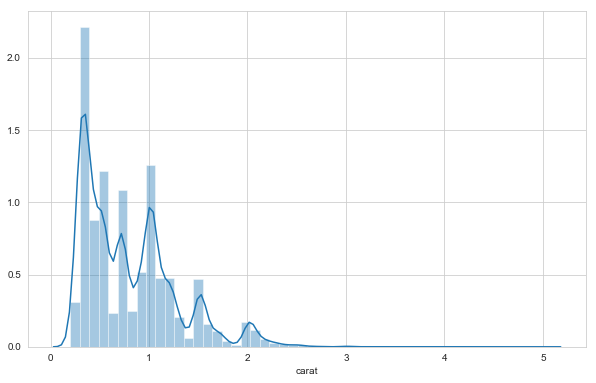

In [3]:
sns.set_style("whitegrid") #optional: set canvas style
plt.figure(figsize=(10,10*0.6186)) #optional: set default plot size
sns.distplot(diamonds["carat"], #required: must be Series, 1d-array, or list.
            bins = 50, #optional: number of bins
            kde = True, #optional: default to True. Whether to plot a gaussian kernel density estimate.
            )
plt.show()

<h3>2. <a id = "sns-scatter">Scatter Plot<a></h3>

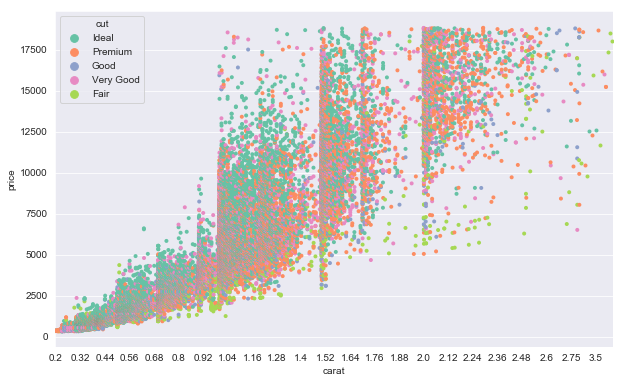

In [4]:
sns.set_style("darkgrid") #optional: set canvas style
plt.figure(figsize=(10,10*0.6186))
scatter_sns = sns.stripplot(x = "carat", # required: x axis data
              y = "price", # required: y axis data
              data = diamonds, # required
              hue = "cut", # optional: use "cut" as color for points
              palette = "Set2", #optional: pick color palette,
              size = 4, #optional: size for makers, default to 5
              )
#reduce density of xticks(https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn)
for ind, label in enumerate(scatter_sns.get_xticklabels()):
    if ind % 12 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

**Use `relplot()` in seaborn 0.90**   
To check your seaborn version, do:

```
!pip freeze | grep seaborn
```

If you don't have seaborn 0.90, Do in anaconda prompt:

```
conda remove seaborn

conda install -c anaconda seaborn
```

`sns.relpot()` for ploting when x and y are both numerical

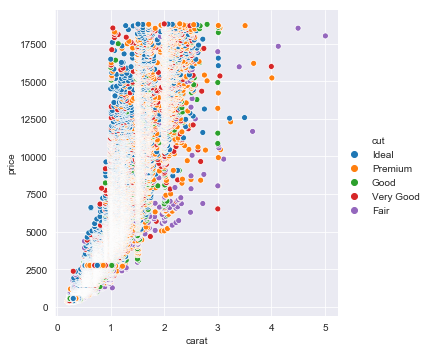

In [5]:
sns.relplot(x = "carat", 
            y = "price",
            data = diamonds,
            hue = "cut", #optional
           kind = "scatter") #optional, default to scatter
plt.show()

<h3>3. <a id = "sns-regression">Regression<a></h3>

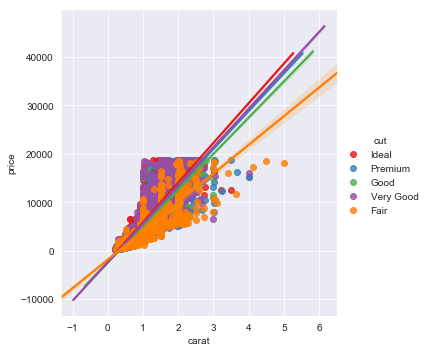

In [6]:
plt.figure(figsize=(10,10*0.6186))
# draw regression line on canvas
sns.lmplot(x = "carat", # required
           y = "price", # required
           data = diamonds, #required
           hue = "cut", # optional, use hue to create group. regression is based on group
          palette = "Set1")
plt.show()

<h3>4. <a id = "sns-text">Text<a>

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


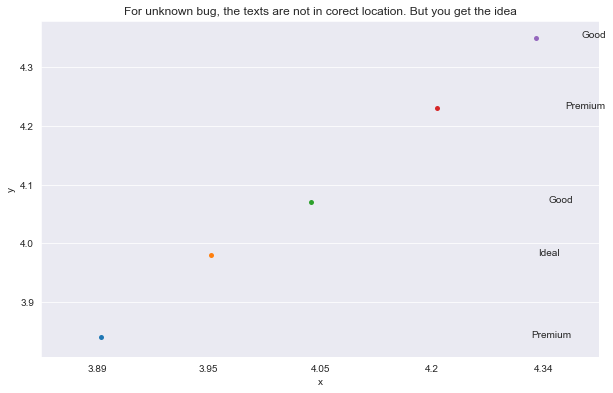

In [7]:
plt.figure(figsize=(10,10*0.6186))
temp_df = diamonds.iloc[0:5,:] # for demonstration, pick first five rows
print(temp_df)
sns.stripplot(x = "x", # required
             y = "y", # required
             data = temp_df) # required

#using for loop to annotate each point
for x,y,s in zip(temp_df["x"],temp_df["y"],temp_df["cut"]):
    plt.text(x,y, # x,y coordinates
             s) #string 
plt.title("For unknown bug, the texts are not in corect location. But you get the idea")
plt.show()

<h3>5. <a id = "sns-bar">Bar Plot<a></h3>

    cut clarity        price
0  Fair      I1  3703.533333
1  Fair      IF  1912.333333
2  Fair     SI1  4208.279412
3  Fair     SI2  5173.916309
4  Fair     VS1  4165.141176


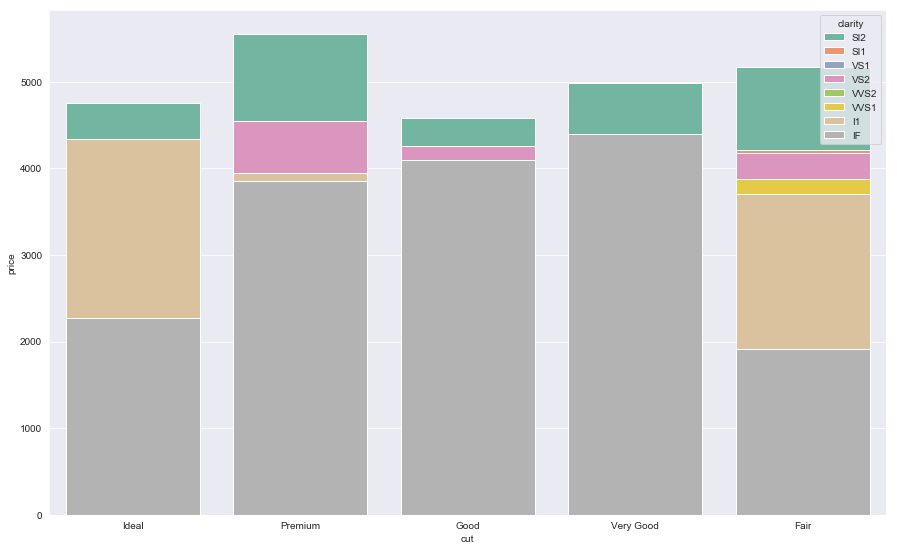

In [8]:
#get average price for different cut
plt.figure(figsize=(15,15*0.6186))
temp_df = diamonds.groupby(["cut","clarity"]).agg({"price":"mean"}).reset_index()
print(temp_df.head())
sns.barplot(x = "cut", # required
            y="price", # required
            data = diamonds, # required
            hue = "clarity", # optional: choose clarity for color
            dodge = False, # optional: stacked bar, defult to True
            palette = "Set2", # optional: choose color palette
           ci = None) # turn off error bars
plt.show()

sns.catpot() for ploting when one of x or y is categorical, while the other one is numerical

    cut clarity        price
0  Fair      I1  3703.533333
1  Fair      IF  1912.333333
2  Fair     SI1  4208.279412
3  Fair     SI2  5173.916309
4  Fair     VS1  4165.141176


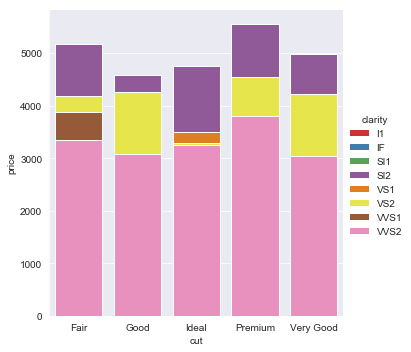

In [9]:
#seaborn 0.9.0
plt.figure(figsize=(10,10*0.6186))
temp_df = diamonds.groupby(["cut","clarity"]).agg({"price":"mean"}).reset_index()
print(temp_df.head())
# draw regression line on canvas
sns.catplot(x = "cut", # required
            y = "price", # required
            data = temp_df, #required
            hue = "clarity", # optional, use hue to create group.
            kind ="bar", #optional, kind of categorical plot, default to strip(scatter plot)
            dodge = False, #position of bars, default to dodge, change it to False for stacked bars
          palette = "Set1")
plt.show()

<h3>6. <a id = "sns-boxplot">Box Plot<a></h3>

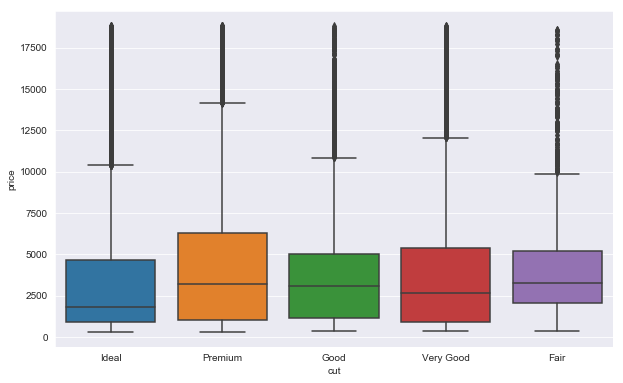

In [10]:
plt.figure(figsize=(10,10*0.6186))
sns.boxplot(x = "cut", # required
           y = "price", # required
           data = diamonds) # required
plt.show()

    cut clarity        price
0  Fair      I1  3703.533333
1  Fair      IF  1912.333333
2  Fair     SI1  4208.279412
3  Fair     SI2  5173.916309
4  Fair     VS1  4165.141176


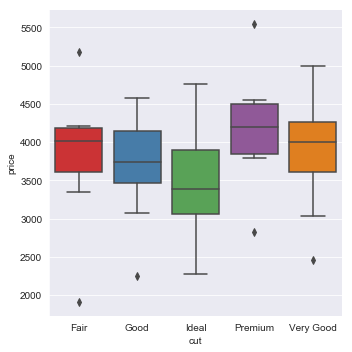

In [11]:
#seaborn 0.9.0
plt.figure(figsize=(10,10*0.6186))
temp_df = diamonds.groupby(["cut","clarity"]).agg({"price":"mean"}).reset_index()
print(temp_df.head())
# draw regression line on canvas
sns.catplot(x = "cut", # required
            y = "price", # required
            data = temp_df, #required
            hue = "cut", # optional, use hue to create group.
            kind ="box", #optional, kind of categorical plot, default to strip(scatter plot)
            dodge = False, #position of bars, default to dodge, change it to False for stacked bars
          palette = "Set1")
plt.show()

<h3>7. <a id = "sns-line">Line Plot<a></h3>

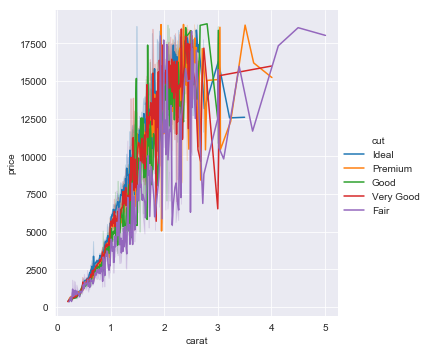

In [12]:
#seaborn 0.9.0
plt.figure(figsize=(10,10*0.6186))
# draw regression line on canvas
sns.relplot(x = "carat", # required
            y = "price", # required
            data = diamonds, #required
            color = "black", #optional
            hue = "cut",
            kind = "line")
plt.show()

<h3>8. <a id = "sns-legend">Legend<a></h3>

    cut clarity        price
0  Fair      I1  3703.533333
1  Fair      IF  1912.333333
2  Fair     SI1  4208.279412
3  Fair     SI2  5173.916309
4  Fair     VS1  4165.141176


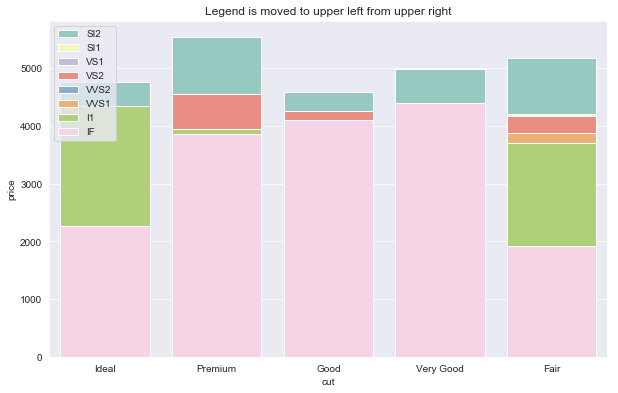

In [13]:
#get average price for different cut
plt.figure(figsize=(10,10*0.6186))
temp_df = diamonds.groupby(["cut","clarity"]).agg({"price":"mean"}).reset_index()
print(temp_df.head())
sns.barplot(x = "cut", # required
            y="price", # required
            data = diamonds, # required
            hue = "clarity", # optional: choose clarity for color
            dodge = False, # optional: stacked bar, defult to True
            palette = "Set3", # optional: choose color palette
            ci = None) # turn off error bars
plt.legend(loc = "upper left") # change legend location
plt.title("Legend is moved to upper left from upper right")
plt.show()

<h3>9. <a id = "sns-labs">Title and Labels<a></h3>

Since Seaborn is built on matplotlib, you can use the same way to add titles and labels.

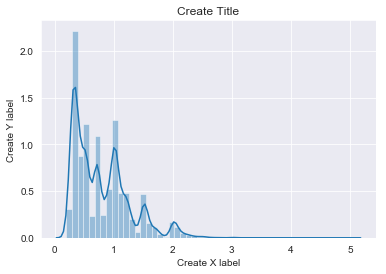

In [14]:
sns.distplot(diamonds["carat"])
plt.title("Create Title")
plt.xlabel("Create X label")
plt.ylabel("Create Y label")
plt.show()

<h3>10. <a id = "sns-attribute">Color and Size<a></h3>
    
In almost any plot functions in seaborn, you can use `hue = "column_name"` to control colors.

You can see available color palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

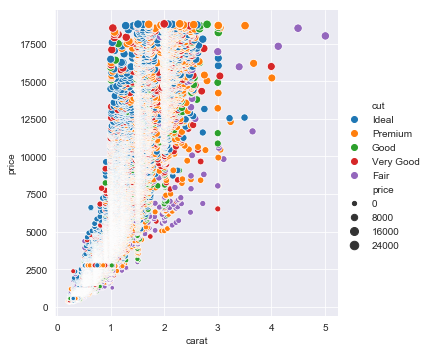

In [15]:
#seaborn 0.9.0
temp = sns.relplot(x = "carat", 
            y = "price",
            data = diamonds,
            hue = "cut", # optional: hue to control size
            size = "price", #optional: size to control size 
           kind = "scatter") # optional, default to scatter
plt.show()

<h2>3.<a id = "ggplot">ggplot</a></h2>

[ggplot](http://ggplot.yhathq.com/) is a plotting system for Python based on R's ggplot2 and the Grammar of Graphics. It is built for making profressional looking, plots quickly with minimal code.

Advantage: Easy to learn and used.
Weakness: Some annoying bugs exist. Functions behave differently comparing to R. Not as powerful as ggplot2 in R.

Resources:
**[Example code of all plot types](http://yhat.github.io/ggpy/)**

#### ggplot installation
run:
```
!pip install git+git://github.com/yhat/ggpy.git@9d00182343eccca6486beabd256e8c89fb0c59e8 --no-cache
```
if encounter error that says "cannot import name 'Timestamp'", 
then do the [following](https://stackoverflow.com/questions/50591982/importerror-cannot-import-name-timestamp/52378663):

>Please go to `.../site-packages/ggplot/stats/smoothers.py` and change
>
>`from pandas.lib import Timestamp`
>to
>
>`from pandas import Timestamp`
>and save.

To get library location, run: 

```
from distutils.sysconfig import get_python_lib
print(get_python_lib())
```

In [16]:
from ggplot import * #import ggplot

D:\Working_Space\Anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
D:\Working_Space\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
#install ggplot first
diamonds_group = diamonds.groupby("cut").mean()["carat"].reset_index()
diamonds_group

,cut,carat
0,Fair,1.046137
1,Good,0.849185
2,Ideal,0.702837
3,Premium,0.891955
4,Very Good,0.806381


**Sample script for data manipulation and creating a visualization in R using data above**
```r 
library(dplyr) # functioning as pandas
library(ggplot2)
library(RColorBrewer)

#data wrangling ----------------
#data for bar chart
diamonds_group <- diamonds %>%
    group_by(cut,clarity) %>%
    summarise(carat = mean(carat)) %>%
    ungroup()

#data for line and text
diamonds_data1 <- diamonds_group %>%
    group_by(cut) %>%
    summarise(y = sum(carat))
    
#creating visualizations ----------------
ggplot(data = diamonds_group, #load data
       mapping = aes(x = cut,y = carat)) + # columns for x and y
    geom_col(aes(fill = clarity), # use cut for group and filling color 
             color = "black",size = 1) + # use black as border color
    geom_line(aes(x = cut, y = y,group = 1), # force line to ignore group,
              color = "skyblue3", # line color
              size = 2, # line width
              linetype = 2, # line type
              data = diamonds_data1) + # use another data for plotting lines on the same canvas
    geom_text(aes(x = cut, y = y,label = round(y,2)), # text location and content
              nudge_y = 0.5, # ajust text locations
              data = diamonds_data1) + # use another data for plotting lines on the same canvas
    labs(x = "Diamond: Cut", y = "Diamond: Carat", #x,y labels
         title = "Diamond Cut vs Carat",subtitle = "Creating visualization using ggplot in R") +# title and subtitle
    scale_fill_brewer(palette = "Set2") + # change color palette
    theme_bw() # change canvas theme

```

![](https://raw.githubusercontent.com/yusuzech/Visualizations/master/sample/Rplot1.png)

<h3>1. <a id = "ggplot-histogram">Histogram<a></h3>

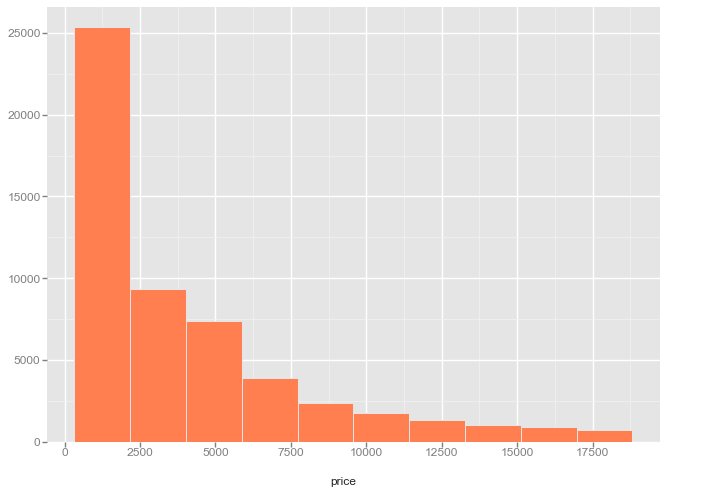

<ggplot: (-9223371880281763317)>

In [18]:
#1.set coordinates and color
#2.change color
ggplot(aes(x = "price"),data = diamonds) +\
    geom_histogram(fill = "coral") 

<h3>2. <a id = "ggplot-scatter">Scatter Plot<a></h3>

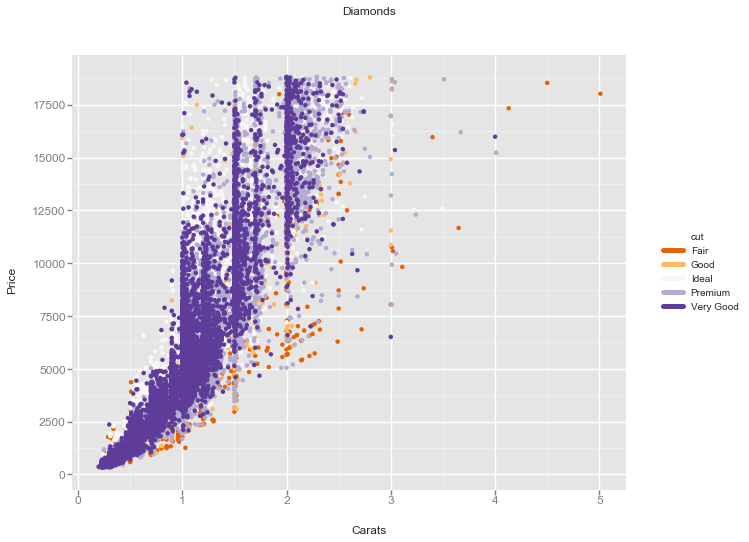

<ggplot: (-9223371880281759081)>

In [19]:
# 1.set coordinates and color
# 2.add a layer of points
# 3.change color palette
# 4.change x label
# 5.change y label
# 6.change title
ggplot(diamonds, aes(x='carat', y='price', color='cut')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Carats") +\
    ylab("Price") +\
    ggtitle("Diamonds")

<h3>3. <a id = "ggplot-regression">Regression<a></h3>

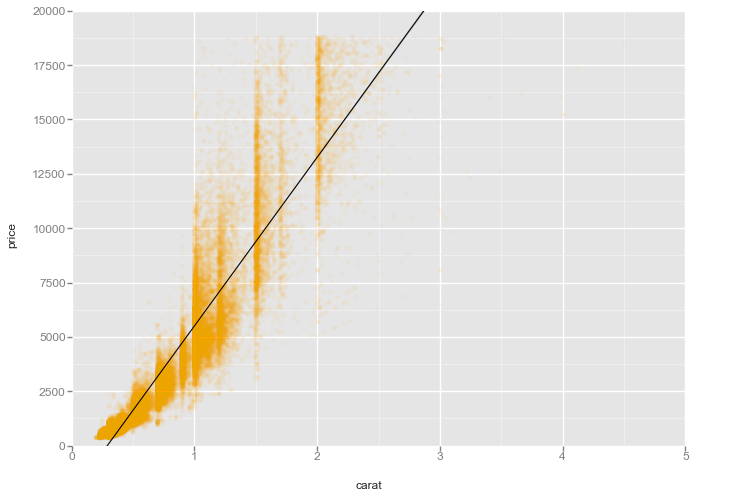

<ggplot: (-9223371880280067910)>

In [20]:
#geom_point to create scatter for reference
#stat_smooth to create regression line
#xlim,ylim to set limit to x and y
ggplot(diamonds, aes(x='carat', y='price')) + \
    geom_point(alpha=0.05, color='orange') + \
    stat_smooth(method='lm') + \
    xlim(0, 5) + \
    ylim(0, 20000)

<h3>4. <a id = "ggplot-text">Text<a></h3>

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


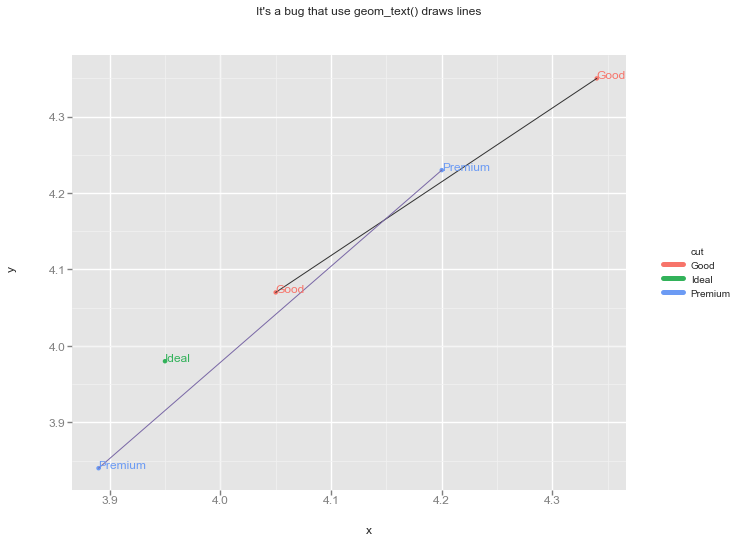

<ggplot: (-9223371880281478670)>

In [21]:
temp_df = diamonds.iloc[0:5,:] # for demonstration, pick first five rows
print(temp_df)

#geom_text() bug: https://github.com/yhat/ggpy/issues/595
ggplot(aes(x = "x", y = "y",color = "cut",label = "cut"),data=temp_df) +\
    geom_point() +\
    geom_text() +\
    ggtitle("It's a bug that use geom_text() draws lines")

<h3>5. <a id = "ggplot-bar">Bar Plot<a></h3>

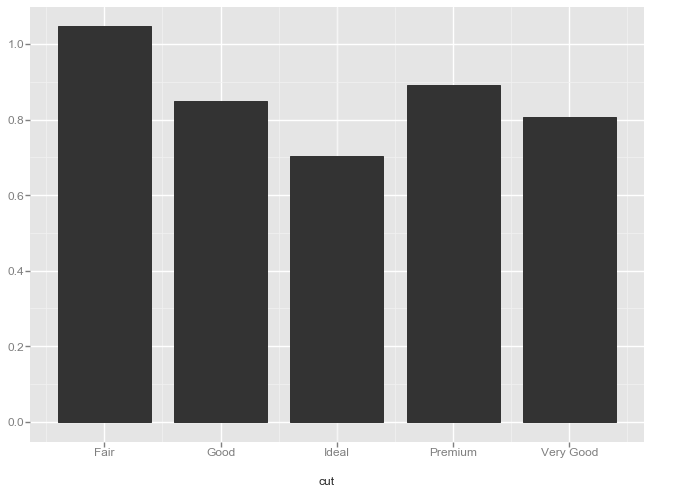

<ggplot: (-9223371880281766940)>

In [22]:
#Normally we could us `fill = "cut"` to change filling colors of bars.
#But pandas was recently updated and removed sort() methods. 
#ggplot in python hasn't updated. So, unfortunately we can't change bar colors now.
ggplot(aes(x = "cut",weight="carat"),data = diamonds_group) +\
    geom_bar()

<h3>6. <a id = "ggplot-boxplot">Box Plot<a></h3>

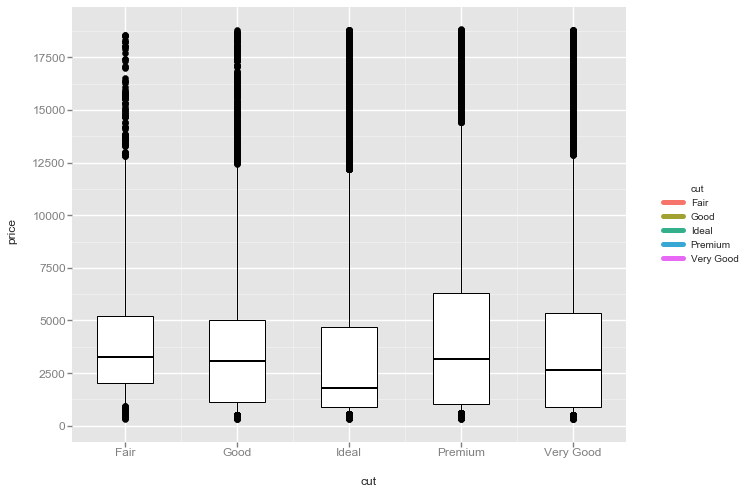

<ggplot: (-9223371880278989820)>

In [23]:
#another bug here, cannot change boxes' color
ggplot(aes(x='cut', y='price',fill = "cut"),data = diamonds) + \
    geom_boxplot()

<h3>7. <a id = "ggplot-line">Line Plot<a></h3>

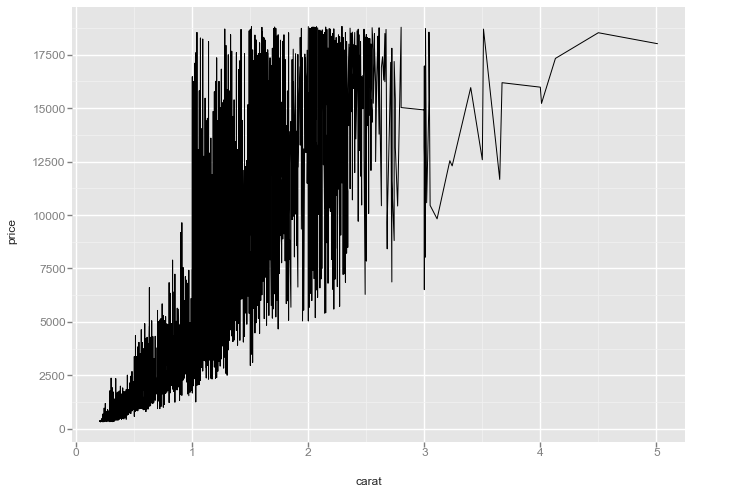

<ggplot: (-9223371880256719328)>

In [24]:
ggplot(aes(x='carat', y='price'),data = diamonds) + geom_line()

<h3>8. <a id = "ggplot-legend">Legend<a></h3>

Legends are automatically added while adding arguments in `aes()`

<h3>9. <a id = "ggplot-labs">Title and Labels<a></h3>

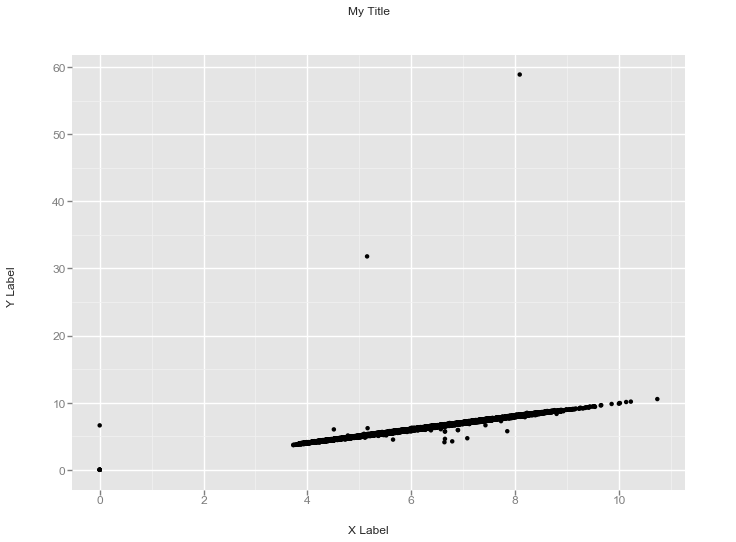

<ggplot: (-9223371880256650741)>

In [25]:
ggplot(aes(x = "x", y = "y"),data=diamonds) +\
    geom_point() +\
    ggtitle("My Title") +\
    xlab("X Label") +\
    ylab("Y Label")

<h3>10. <a id = "ggplot-attribute">Color and Size<a></h3>

Change color and size *in* `aes()` to make these attributes change according to another variable.  
Or change color *outside* `aes()` to apply this change globally

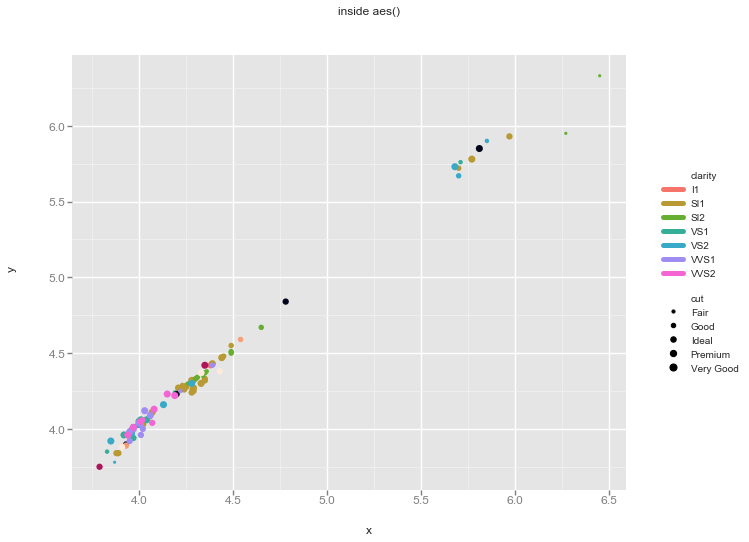

<ggplot: (-9223371880256634848)>

In [26]:
temp_df = diamonds.iloc[0:100,:] # for demonstration, pick first five rows
ggplot(aes(x = "x", y = "y",color = "clarity",size = "cut"),data=temp_df) +\
    geom_point() +\
    ggtitle("inside aes()")

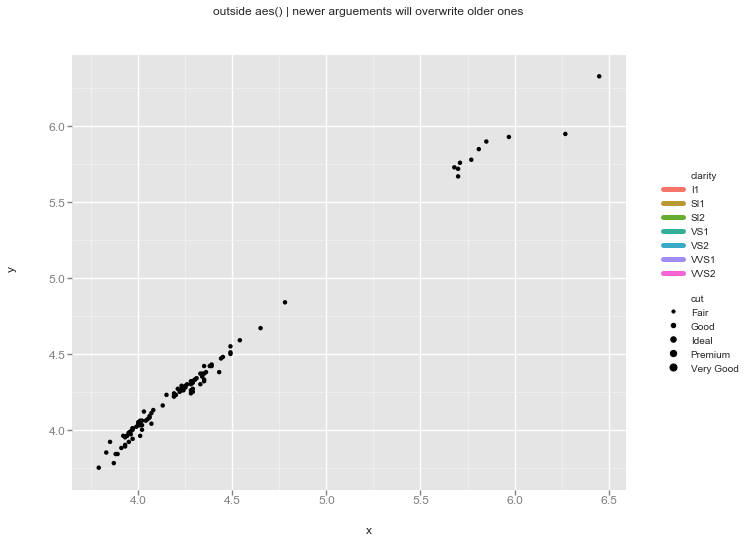

<ggplot: (156599168502)>

In [27]:
ggplot(aes(x = "x", y = "y",color = "clarity",size = "cut"),data=temp_df) +\
    geom_point(color = "black", size = 20) +\
    ggtitle("outside aes() | newer arguements will overwrite older ones")